In [1]:
import pandas as pd
import numpy as np

articles = pd.read_csv("../process_articles/processed_articles.csv")

/var/folders/r4/qqn8tv4d7g18t_5fsxt6y1340000gn/T/ipykernel_6631/2320701937.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print(len(articles))
articles.head(1)

2189


,authors,title,date,year,edition,url,text,cleaned_text,cleaned_text_wspaces,unigram,bigram,unigram_count,bigram_count
0,NaN,本期导读,2024-01-01,2024.0,1.0,http://www.qstheory.cn/dukan/qs/2024-01/01/c_1...,本期发表了习近平总书记的重要文章《以美丽中国建设全面推进人与自然和谐共生的现代化》。文章强调...,本期发表了习近平总书记的重要文章以美丽中国建设全面推进人与自然和谐共生的现代化文章强调今后5...,本期 发表 了 习近平 总书记 的 重要 文章 以 美丽 中国 建设 全面 推进 人与自然 ...,"['本期', '发表', '了', '习近平', '总书记', '的', '重要', '文章...","['本期发表', '发表了', '了习近平', '习近平总书记', '总书记的', '的重要...","{'的': 24, '文章': 14, '建设': 11, '中国': 10, '美丽': ...","{'美丽中国': 9, '的文章': 9, '中国建设': 7, '习近平总书记': 4, ..."


In [39]:
# set up matplotlib to use Chinese text
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

fpath = Path(mpl.get_data_path(), "fonts/ttf/NotoSansSC-Regular.ttf")
    
def determine_edition_quarter(edition_number):
    if edition_number in range(1,7):
        return 1
    elif edition_number in range(7,13):
        return 2
    elif edition_number in range(13, 19):
        return 3
    else:
        return 4

def quarter_count(articles_df, search_term):
    term_quarter_count = {}

    for index, row in articles_df.iterrows():
        year = row['year']
        if np.isnan(year):
            continue
        edition = row['edition']

        quarter = determine_edition_quarter(edition)
        
        if year not in term_quarter_count.keys():
            term_quarter_count[year] = {}
        if quarter not in term_quarter_count[year].keys():
            term_quarter_count[year][quarter] = 0

        try: 
            quarter_count = term_quarter_count[year][quarter]
            quarter_count += row['cleaned_text'].count(search_term)
            term_quarter_count[year][quarter] = quarter_count
        except:
            pass

    # sort the years
    term_quarter_count = {k: v for k, v in sorted(term_quarter_count.items(), key=lambda item: item[0])}

    return term_quarter_count

def quarter_count_labels(term_quarter_count):
    # this is only for 2019-2023, does not include 2024
    x_vals = [(str(year)[0:4] + " Q" + str(quarter)) for year in term_quarter_count.keys() for quarter in [1, 2, 3, 4]]
    
    return x_vals[:-4]

def only_counts(term_quarter_count):
    # returns the ordered list of all the quarter counts for 2019-2023
    quarters = sum([list(year.values()) for year in term_quarter_count.values()],[])
    
    return quarters[:-1]  # drop the last quarter (2024 Q1), since it isn't compelete yet

def plot_quarter_counts(df, term, translation):
    # get the data
    term_quarter_count = quarter_count(df, term)
    xvalues = quarter_count_labels(term_quarter_count)
    yvalues = only_counts(term_quarter_count)

    # plot
    fig, ax = plt.subplots()

    ax.plot(xvalues, yvalues)
    ax.set_title(f'Qiushi Use of \"{term}\" ({translation}) Over Time', font=fpath)
    ax.set_xlabel('Quarter')
    ax.set_ylabel(f"Uses of \"{term}\"", font=fpath)

    ax.tick_params(axis='x', rotation=50)
    ax.grid()
    plt.show()

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

path = '/Users/calebharding/Documents/BYU/2023-2024/China_Project/qiushi_venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSansSC-Regular.ttf'
font = font_manager.FontProperties(fname=path)

def plot_multiple_quarter_counts(articles_df, nested_terms):
    """Input should be a df of the articles, and a nested list of the form [[term1, translation1], [term2, translation2]]"""

    fig, ax = plt.subplots()

    for term_pair in nested_terms:
        term = term_pair[0]
        term_quarter_count = quarter_count(articles_df, term)
        yvals = only_counts(term_quarter_count)
        xvals = quarter_count_labels(term_quarter_count)

        label = " ".join(term_pair)

        ax.plot(xvals, yvals, label=label)

    ax.set_xlabel("Quarter")
    ax.set_ylabel("Use Count")
    ax.set_title("Use of Select Terms in Qiushi Over Time")
    ax.legend(prop=font)
    ax.tick_params(axis='x', rotation=50)
    ax.grid()
    plt.show()
        

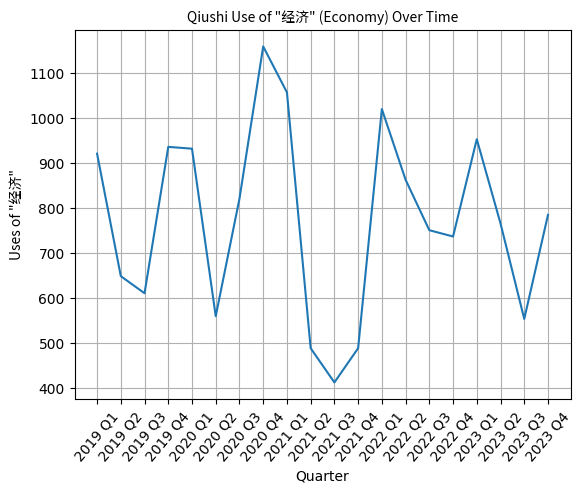

In [44]:
plot_quarter_counts(articles, "经济", "Economy")

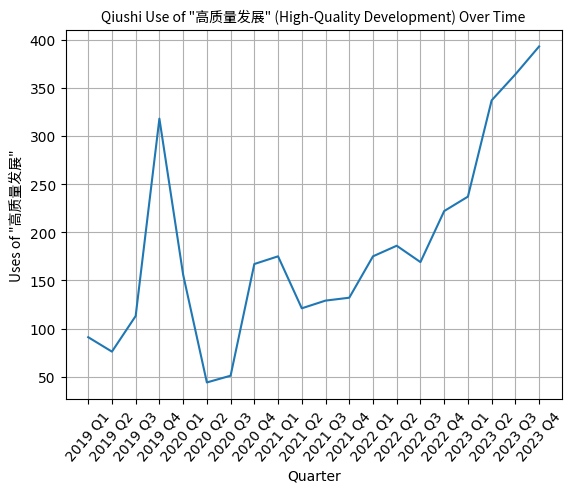

In [46]:
plot_quarter_counts(articles, "高质量发展", "High-Quality Development")

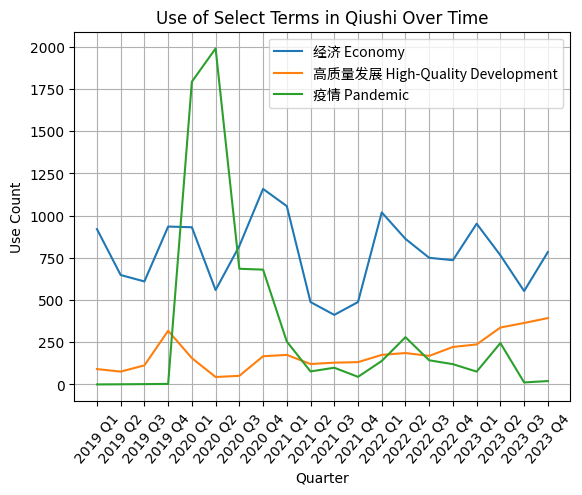

In [47]:
plot_multiple_quarter_counts(articles, [["经济", "Economy"],["高质量发展", "High-Quality Development"],["疫情", "Pandemic"]])

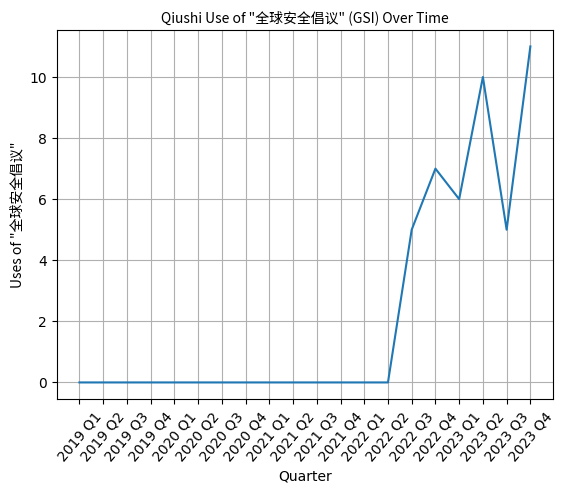

In [48]:
plot_quarter_counts(articles, "全球安全倡议", "GSI")

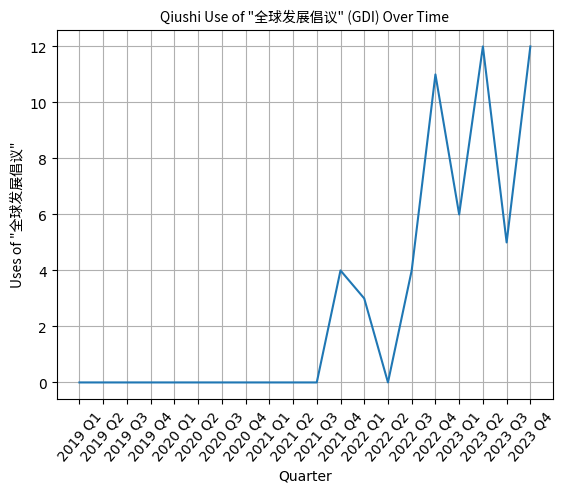

In [49]:
plot_quarter_counts(articles, "全球发展倡议", "GDI")

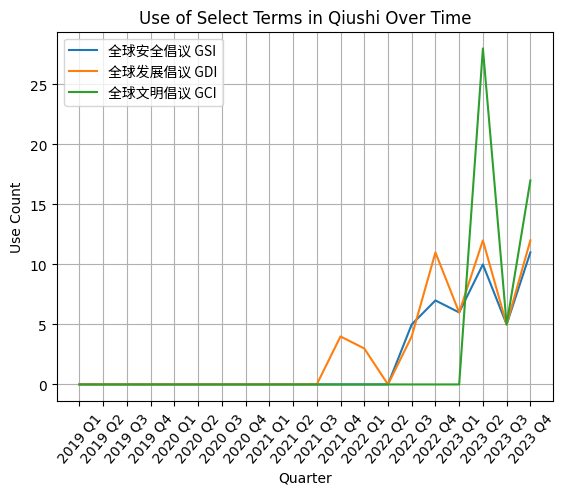

In [50]:
plot_multiple_quarter_counts(articles, [["全球安全倡议", "GSI"],["全球发展倡议", "GDI"],["全球文明倡议", "GCI"]])

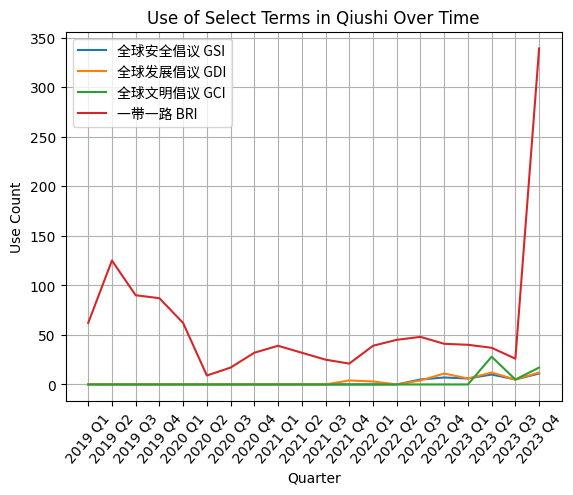

In [51]:
plot_multiple_quarter_counts(articles, [["全球安全倡议", "GSI"],["全球发展倡议", "GDI"],["全球文明倡议", "GCI"],["一带一路", "BRI"]])

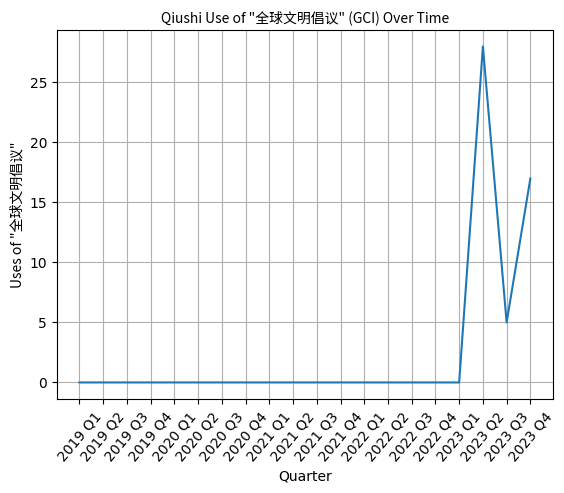

In [52]:
plot_quarter_counts(articles, "全球文明倡议", "GCI")

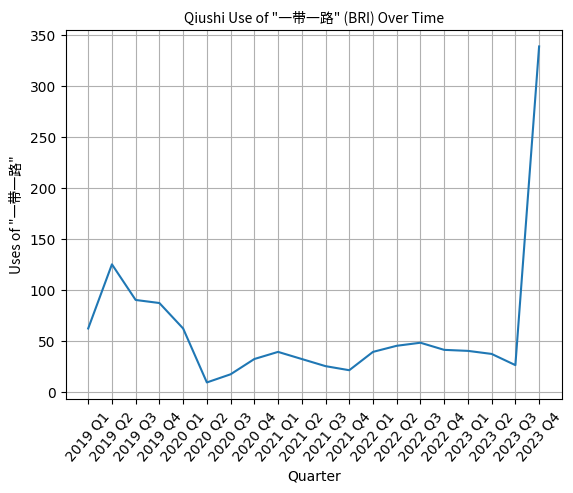

In [53]:
plot_quarter_counts(articles, "一带一路", "BRI")